# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

#0Ty63ceoRnnJKVEYP0VQpk Sting

#Obtener las mejores canciones del artista

results = spotify.artist_top_tracks("0Ty63ceoRnnJKVEYP0VQpk")

songs = []

for track in results ['tracks']:
    songs.append({"name":track['name'],
                  "popularity":track['popularity'],
                  "duration_min":track['duration_ms']/60000})
    
df = pd.DataFrame(songs)

print(df)


                                                name  popularity  duration_min
0                                     Fields Of Gold          80      3.702000
1                                  Shape Of My Heart          79      4.653767
2                             Englishman In New York          78      4.454433
3                                            Fragile          71      3.938433
4                                        Desert Rose          59      4.764883
5                     If I Ever Lose My Faith In You          69      4.508883
6  What Could Have Been (from the series Arcane L...          69      3.557900
7                                           Redlight          66      4.048000
8                                              Reste          65      3.858667
9                                           Dreaming          65      2.837683


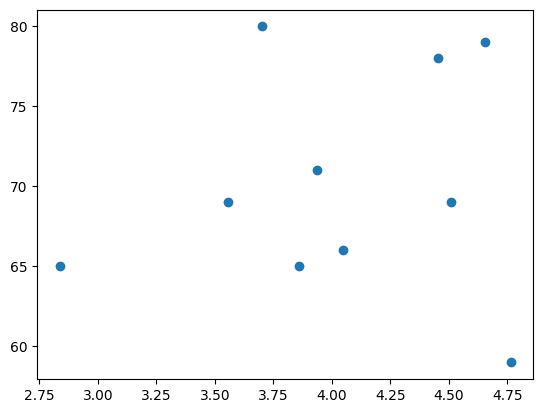

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['duration_min'],df['popularity'])

plt.show()

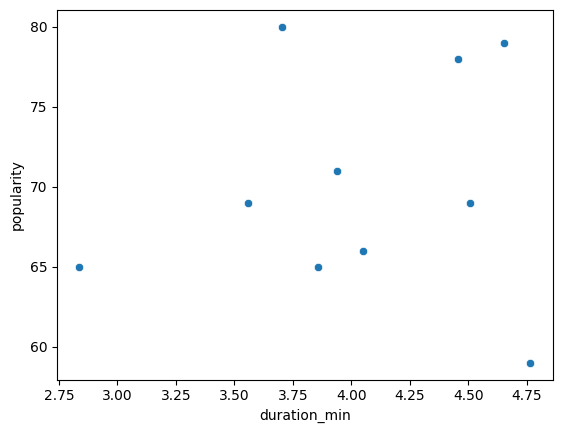

In [4]:
sns.scatterplot(df,x='duration_min',y='popularity')
plt.show()

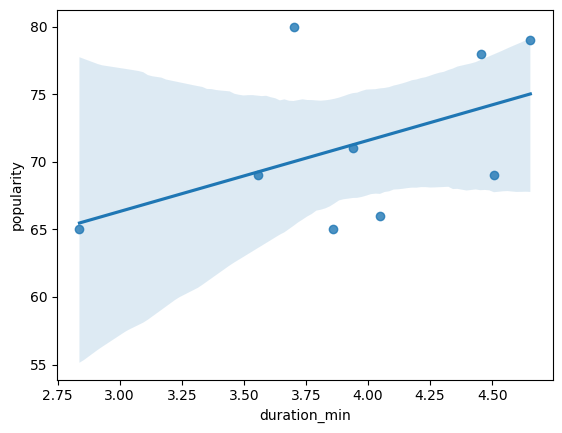

In [7]:
sns.regplot(df[df['popularity']>60],x='duration_min',y='popularity')
plt.show()

## Conclusión 

Si excluimos el outlier de "Desert Rose" que tiene una popularidad de 59 y una duración de 4.76 min conseguimos que la relación entre tiempo y popularidad es positiva para todas las demas canciones.


In [ ]:
# pendiente por revisar
"""
API Caida
track_ids = [track["id"] for track in results["tracks"]]
features = spotify.audio_features(track_ids[0])
features
"""

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0I1DJdLt9BKOb7GWmWxCjo with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0I1DJdLt9BKOb7GWmWxCjo:
 None, reason: None